In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('vehicles_dataset_prepared.csv')

In [3]:
df.shape

(9619, 1463)

In [4]:
df.head()

,id,price,price_category,is_audi,is_ford,is_chevrolet,is_toyota,x0_diesel,x0_electric,x0_gas,...,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,54990,high,0,0,0,0,1.0,0.0,0.0,...,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669,-0.615846,1.120284,-1.322394
1,7316380095,16942,medium,0,1,0,0,0.0,0.0,0.0,...,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799,1.623784,-1.374972,-0.695973
2,7313733749,35590,high,0,0,0,0,0.0,0.0,1.0,...,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930,-0.615846,-0.376870,-0.852578
3,7308210929,14500,medium,0,0,0,1,0.0,0.0,1.0,...,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810,-0.615846,1.120284,-0.226157
4,7303797340,14590,medium,0,0,0,0,0.0,0.0,0.0,...,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669,-0.615846,0.122182,-0.069552


In [5]:
df.price_category.value_counts()

medium    3220
low       3200
high      3199
Name: price_category, dtype: int64

Text(0.5, 1.0, 'Распределение стоимости автомобиля')

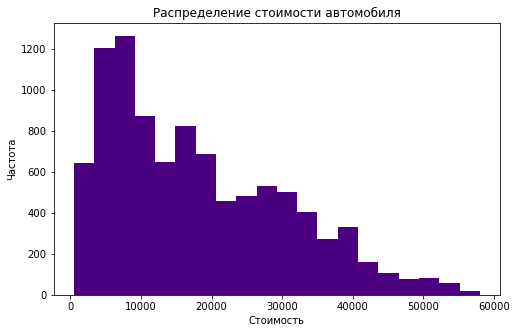

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(df.price, color='indigo', bins=20)
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля')

In [7]:
df.columns

Index(['id', 'price', 'price_category', 'is_audi', 'is_ford', 'is_chevrolet',
       'is_toyota', 'x0_diesel', 'x0_electric', 'x0_gas',
       ...
       'long_std', 'year_std', 'odometer/price_std', 'desc_len_std',
       'model_in_desc_std', 'model_len_std', 'model_word_count_std',
       'month_std', 'dayofweek_std', 'diff_years_std'],
      dtype='object', length=1463)

In [8]:
df_prepared = df.copy()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
x_train.shape, x_test.shape

((6733, 1462), (2886, 1462))

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [15]:
predicted_train = clf.predict(x_train)
predicted_test = clf.predict(x_test)

In [16]:
predicted_train

array(['high', 'high', 'high', ..., 'medium', 'high', 'medium'],
      dtype=object)

In [17]:
predicted_test

array(['high', 'medium', 'low', ..., 'low', 'medium', 'low'], dtype=object)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(accuracy_score(y_train, predicted_train))
print(accuracy_score(y_test, predicted_test))

1.0
0.9996534996534997


In [20]:
df_prepared = df_prepared.drop(['price', 'odometer/price_std'], axis=1)

In [21]:
x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [23]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
predicted_train = clf.predict(x_train)
predicted_test = clf.predict(x_test)

In [25]:
print(accuracy_score(y_train, predicted_train))
print(accuracy_score(y_test, predicted_test))

1.0
0.6722106722106722


In [26]:
clf.feature_importances_

array([0.03332029, 0.00082732, 0.00286942, ..., 0.00258086, 0.01686121,
       0.03845658])

In [27]:
f_imp_list = list(zip(x_train.columns, clf.feature_importances_))
f_imp_list

[('id', 0.033320292192199855),
 ('is_audi', 0.0008273235598443181),
 ('is_ford', 0.0028694188203962937),
 ('is_chevrolet', 0.0022138516994448854),
 ('is_toyota', 0.003199959896476493),
 ('x0_diesel', 0.033097961449185156),
 ('x0_electric', 0.0006947852275420483),
 ('x0_gas', 0.002457236729824297),
 ('x0_hybrid', 0.0013858022386644174),
 ('x0_other', 0.00026329696711896927),
 ('std_scaled_odometer', 0.08071436882272087),
 ('short_model_-benz', 0.0),
 ('short_model_1', 0.0),
 ('short_model_124', 0.0),
 ('short_model_128i', 0.0),
 ('short_model_135i', 0.0),
 ('short_model_1500', 0.0009602893143283356),
 ('short_model_163869', 0.0),
 ('short_model_1928', 0.0),
 ('short_model_1951', 0.0),
 ('short_model_1954', 0.0),
 ('short_model_1960s', 0.0),
 ('short_model_1966', 0.00038346458824074065),
 ('short_model_1968', 0.0),
 ('short_model_1972', 0.0),
 ('short_model_1977', 0.0),
 ('short_model_1978', 0.0),
 ('short_model_198.5', 0.0),
 ('short_model_1988', 0.0),
 ('short_model_1994', 0.0),
 ('sho

In [28]:
f_imp_list.sort(key = lambda x: x[1], reverse=True)

In [29]:
f_imp_list

[('age_category_new', 0.1751319079983745),
 ('std_scaled_odometer', 0.08071436882272087),
 ('model_len_std', 0.07248658451655508),
 ('desc_len_std', 0.06696974451414726),
 ('lat_std', 0.04425341171273304),
 ('diff_years_std', 0.03845658408007232),
 ('long_std', 0.036261429494332476),
 ('id', 0.033320292192199855),
 ('x0_diesel', 0.033097961449185156),
 ('year_std', 0.027934918952513186),
 ('dayofweek_std', 0.016861205318725658),
 ('manufacturer_kia', 0.009083054380770436),
 ('short_model_wrangler', 0.009059268899454843),
 ('manufacturer_ram', 0.008715580410053735),
 ('model_word_count_std', 0.00651012971411491),
 ('short_model_silverado', 0.006114293549385079),
 ('manufacturer_chevrolet', 0.006037549559551979),
 ('manufacturer_hyundai', 0.005989720039399369),
 ('short_model_f-150', 0.005880259584056658),
 ('short_model_Scion', 0.004865746378858322),
 ('model_in_desc_std', 0.00469990703103088),
 ('manufacturer_volkswagen', 0.004669023238068298),
 ('manufacturer_mercedes-benz', 0.0045903